#  Universidad de Costa Rica

### Facultad de Ingeniería

### Escuela de Ingeniería Eléctrica

#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

Hecho por: Katzrin Nikhole Myrie Berger 
Carné: B64980




# Pregunta 1
La transmisión de información se realiza al usar modulación por desplazamiento de fase binario (Binary Phase Shift Keying, BPSK)

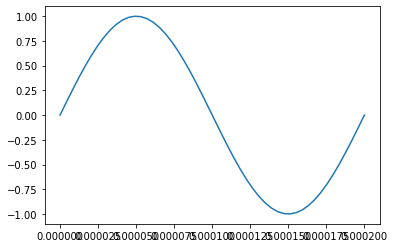

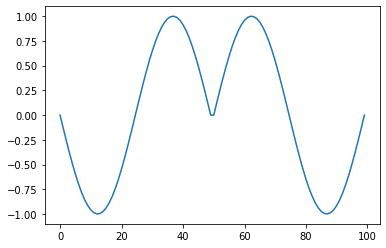

In [89]:
#PASO1:
''' Crear un esquema de modulación BPSK para los bits presentados. Esto implica asignar una forma de onda sinusoidal normalizada
(amplitud unitaria) para cada bit y luego una concatenación de todas estas formas de onda'''

#Se importan las librerías necesarias para el desarrollo de lo solicitado
import csv
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats
from scipy import signal
from scipy import integrate
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt


# Leer los bits brindados en la tarea
B = pd.read_csv('bits10k.csv'
                , header = None )
bits = np.array(B)

# frecuencia de operación

f = 5000 # Hz(portadora)

# Periodo

T= 1/f #duración del periodo

P=50 #número de puntos de muesrtreo por periodo

tp= np.linspace(0, T, P)

#creación de la forma de onda portadora

# Número de bits
N = 10000

sinus= np.sin(2 *np.pi* f* tp)

#visualización de la forma de onda

plt.plot(tp, sinus)

plt.show()

#frecuencia de muestreo

fs= P/T 

#creación de la línea temporal para toda la señal tx

t=np.linspace(0, N*T, N*P)

#inicializar la señal

señal= np.zeros(t.shape)

#creación de la señal modulada

for k, b in enumerate(bits):
    if b== 1:
        señal[k*P:(k+1)*P] = sinus 
    
    else:
        señal[k*P:(k+1)*P] = -sinus
# plot de la señal modulada  
        
  
plt.plot(señal[0: 100]) 

plt.show()
  


# Pregunta 2

In [17]:
"""
2. Calcular la potencia promedio 
de la señal modulada generada.  
"""

# P instantánea

Pinst = señal**2

# Potencia promedio de p instantánea en whatts

Ppm = integrate.trapz(Pinst, t) / (N * T)

print('La potencia promedio es:', Ppm)


La potencia promedio es: 0.4900009800019598


# Pregunta 3

[0.881248669505027, 0.7854137034254703, 0.7000007000010499, 0.6238762805702143, 0.5560303203375953]


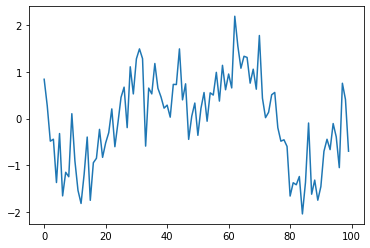

In [57]:
"""
3. Simular un canal ruidoso del tipo 
AWGN (ruido aditivo blanco gaussiano) 
con una relación señal a ruido (SNR) 
desde -2 hasta 3 dB.
"""
# se crea un espacio vectorial en blanco para que se guarden los sigmas
sigmas=[]

# Relación señal-a-ruido deseada
for SNR in range(-2,3):

# Potencia del ruido para SNR y potencia de la señal dadas
    Pn = Ppm / (10**(SNR / 10))

# Desviación estándar del ruido
    sigma = Pn**(1/2)
    sigmas.append(sigma)
#creando el ruido(media, desviación)(Pn=sigma^2)
       
noise=np.random.normal(0,sigma,señal.shape)

#simular el canal
Rx= señal+ noise

# plot de la señal recibida con ruido  
print(sigmas)
plt.plot(Rx[0: 100]) 

plt.show()
  

# Pregunta 4

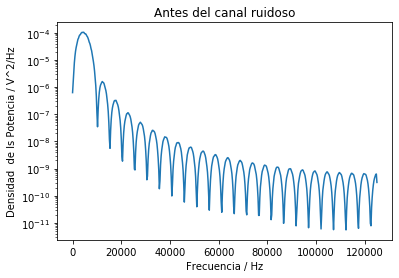

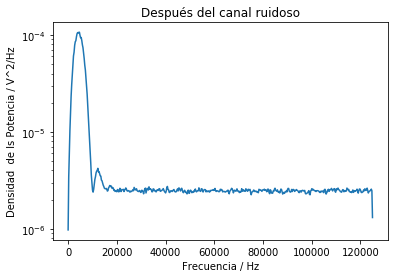

In [81]:
'''
4. Graficar la densidad espectral de potencia 
de la señal con el método de Welch (SciPy), 
antes y después del canal ruidoso.
'''

# señal antes canal ruidoso
fw, PSD = signal.welch(señal, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD)
plt.title('Antes del canal ruidoso')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad  de ls Potencia / V^2/Hz')
plt.show()

# señal después del canal ruidoso
fw, PSD = signal.welch(Rx, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD)
plt.title('Después del canal ruidoso')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad  de ls Potencia / V^2/Hz')
plt.show()

# Pregunta 5

In [86]:
"""
Graficar la densidad espectral de potencia de la señal con el método de Welch
(SciPy), antes y después del canal ruidoso.

"""
#detección de energía de la onda original

Es= np.sum(sinus**2)

#inicialización de los bits recibidos 

bitsRx=np.zeros(bits.shape)
# se inicializa un vector de errores
VBER=[]
#decódificación, por detección de energía
for s in sigmas:
    
    Rx = señal + np.random.normal(0, s, señal.shape)
    

for k, b in enumerate(bits):
    
    Ep= np.sum(Rx[k*P:(k+1)*P] *sinus)# producto de dos funciones 
   
    if Ep > (Es)/2:
        
        bitsRx[k]=1
    
    else:
        bitsRx[k]=0

err=np.sum(np.abs(bits-bitsRx))
BER= err/N
VBER.append(BER)
print (VBER)
err=np.sum(np.abs(bits-bitsRx))
print('la cantodad de bits',N)
print ('por lo tanto la taza de error es:',BER)


[0.0]
la cantodad de bits 10000
por lo tanto la taza de error es: 0.0


# Pregunta 6

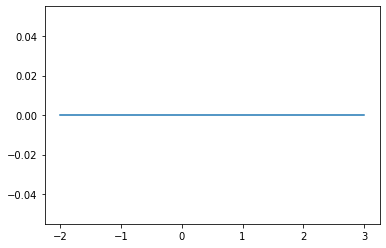

In [88]:
'''6. Graficar BER versus SNR.
''' 
SNR1 = [-2,-1,0,1,2,3]
VBER1= [0, 0, 0, 0, 0, 0]     
plt.plot(SNR1,VBER1)
plt.show()